The symbolic Gravity Matrix is:  

⎡                                                                             
⎢                                                                             
⎢-4.02042249⋅((-sin(θ₂)⋅sin(θ₃) - cos(θ₂)⋅cos(θ₃))⋅cos(θ₄) + (sin(θ₂)⋅cos(θ₃) 
⎢                                                                             
⎢           -4.02042249⋅((sin(θ₂)⋅sin(θ₃) + cos(θ₂)⋅cos(θ₃))⋅cos(θ₄) + (-sin(θ
⎢                                                                             
⎢                                        -4.02042249⋅((-sin(θ₂)⋅sin(θ₃) - cos(
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

                                                                              
                

(0.0, 1000.0)

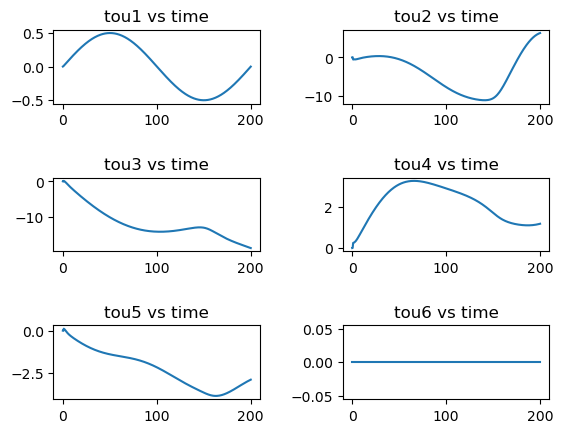

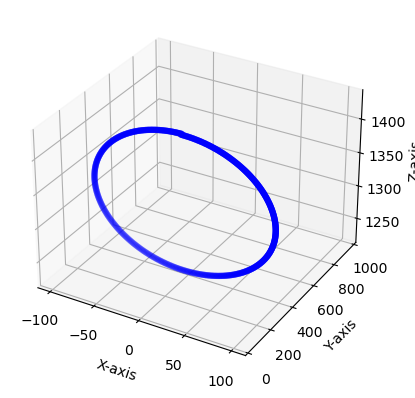

In [3]:
from sympy import *
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d,Axes3D

## Code to get the symbolic final transformation matrix 

theta_1 = symbols("theta_1")   
theta_2 = symbols("theta_2")   
theta_3 = symbols("theta_3")   
theta_4 = symbols("theta_4")
theta_5 = symbols("theta_5")   
theta_6 = symbols("theta_6")
d1 = symbols("d1")
d2 = symbols("d2")
d3 = symbols("d3")
d4 = symbols("d4")
d5 = symbols("d5")
d6 = symbols("d6")
d7 = symbols("d7")
d8 = symbols("d8")
t=symbols("t")

## Defining transformation matrices

t01 = Matrix([[cos(theta_1),0,-sin(theta_1),0],[sin(theta_1),0,cos(theta_1),0],[0,-1,0,d1],[0,0,0,1]])
t12 = Matrix([[cos(theta_2),0,sin(theta_2),0],[sin(theta_2),0,-cos(theta_2),0],[0,1,0,d2],[0,0,0,1]])
t23 = Matrix([[1,0,0,0],[0,0,-1,0],[0,1,0,d3],[0,0,0,1]])
t34 = Matrix([[cos(theta_3),0,-sin(theta_3),0],[sin(theta_3),0,cos(theta_3),0],[0,-1,0,d4],[0,0,0,1]])
t45 = Matrix([[1,0,0,0],[0,0,1,0],[0,-1,0,d5],[0,0,0,1]])
t56 = Matrix([[cos(theta_4),0,sin(theta_4),0],[sin(theta_4),0,-cos(theta_4),0],[0,1,0,d6],[0,0,0,1]])
t67 = Matrix([[cos(theta_5),0,-sin(theta_5),0],[sin(theta_5),0,cos(theta_5),0],[0,-1,0,d7],[0,0,0,1]])
t78 = Matrix([[cos(theta_6),-sin(theta_6),0,0],[sin(theta_6),cos(theta_6),0,0],[0,0,1,d8],[0,0,0,1]])


## Obtaining Matrix T

T1=t01.subs(d1,0.128)
T2=t01.subs(d1,0.128)*t12.subs(d2,0.176)
T3=t01.subs(d1,0.128)*t12.subs(d2,0.176)*t23.subs(d3,0.6127)*t34.subs(d4,0.176)
T4=t01.subs(d1,0.128)*t12.subs(d2,0.176)*t23.subs(d3,0.6127)*t34.subs(d4,0.176)*t45.subs(d5,0.5716)*t56.subs(d6,0.1639)
T5=t01.subs(d1,0.128)*t12.subs(d2,0.176)*t23.subs(d3,0.6127)*t34.subs(d4,0.176)*t45.subs(d5,0.5716)*t56.subs(d6,0.1639)*t67.subs(d7,0.1157)
T6=t01.subs(d1,0.128)*t12.subs(d2,0.176)*t23.subs(d3,0.6127)*t34.subs(d4,0.176)*t45.subs(d5,0.5716)*t56.subs(d6,0.1639)*t67.subs(d7,0.1157)*t78.subs(d8,0.1922)


## Obtaining Column Matrices Z

Z1=expand(T1[0:3,2])
Z2=expand(T2[0:3,2])
Z3=expand(T3[0:3,2])
Z4=expand(T4[0:3,2])
Z5=expand(T5[0:3,2])
Z6=expand(T6[0:3,2])

## Obtaining Row Matrix P

P=expand(T6[0:3,3])

## Obtaining partial derivate of P wrt different joint angles 

p1=expand(diff(P,theta_1))
p2=expand(diff(P,theta_2))
p3=expand(diff(P,theta_3))
p4=expand(diff(P,theta_4))
p5=expand(diff(P,theta_5))
p6=expand(diff(P,theta_6))

## Obtaining Jacobian Matrix J

J1=Matrix.hstack(p1,p2,p3,p4,p5,p6)
J2=Matrix.hstack(Z1,Z2,Z3,Z4,Z5,Z6)
J3=Matrix.vstack(J1,J2)
J=expand(J3)

## Computing the transformation matrices to the centre of mass of the links

R1=t01.subs([(d1,0.128/2)])
R2=t01.subs([(d1,0.128)])*t12.subs([(d2,0.176/2)])
R3=t01.subs([(d1,0.128)])*t12.subs([(d2,0.176)])*t23.subs([(d3,0.6127/2)])
R4=t01.subs([(d1,0.128)])*t12.subs([(d2,0.176)])*t23.subs([(d3,0.6127)])*t34.subs([(d4,0.176/2)])
R5=t01.subs([(d1,0.128)])*t12.subs([(d2,0.176)])*t23.subs([(d3,0.6127)])*t34.subs([(d4,0.176)])*t45.subs([(d5,0.5716/2)])
R6=t01.subs([(d1,0.128)])*t12.subs([(d2,0.176)])*t23.subs([(d3,0.6127)])*t34.subs([(d4,0.176)])*t45.subs([(d5,0.5716)])*t56.subs([(d6,0.1639/2)])
R7=t01.subs([(d1,0.128)])*t12.subs([(d2,0.176)])*t23.subs([(d3,0.6127)])*t34.subs([(d4,0.176)])*t45.subs([(d5,0.5716)])*t56.subs([(d6,0.1639)])*t67.subs([(d7,0.1157/2)])
R8=t01.subs([(d1,0.128)])*t12.subs([(d2,0.176)])*t23.subs([(d3,0.6127)])*t34.subs([(d4,0.176)])*t45.subs([(d5,0.5716)])*t56.subs([(d6,0.1639)])*t67.subs([(d7,0.1157)])*t78.subs([(d8,0.922/2)])

## Extracting the height of the links

h1=R1[2,3]
h2=R2[2,3]
h3=R3[2,3]
h4=R4[2,3]
h5=R5[2,3]
h6=R6[2,3]
h7=R7[2,3]
h8=R8[2,3]

## Computing the potential energies of the links

PE1=3.786*9.81*h1
PE2=6.154*9.81*h2
PE3=8.716*9.81*h3
PE4=2.593*9.81*h4
PE5=4.656*9.81*h5
PE6=1.459*9.81*h6
PE7=1.459*9.81*h7
PE8=0.889*9.81*h8

PE=PE1+PE2+PE3+PE4+PE5+PE6+PE7+PE8

## Computing the gravity matrix

G1=diff(PE,theta_1)
G2=diff(PE,theta_2)
G3=diff(PE,theta_3)
G4=diff(PE,theta_4)
G5=diff(PE,theta_5)
G6=diff(PE,theta_6)

G = Matrix([[G1],[G2],[G3],[G4],[G5],[G6]])

print("The symbolic Gravity Matrix is: ",'\n')
pprint(G)

the1=0.00000001
the2=-0.00000001
the3=0.00000001
the4=0.00000001
the5=-0.00000001
the6=-0.00000001
t=0
dt=0.5
xxx=[]
yyy=[]
zzz=[]
torque1=[]
torque2=[]
torque3=[]
torque4=[]
torque5=[]
torque6=[]
time=[]


while t<=200:
    
    # Substituting the angle values into the Jacobian
    
    JS=J.subs([(theta_1,the1),(theta_2,the2),(theta_3,the3),(theta_4,the4),(theta_5,the5),(theta_6,the6)])
    
    # Computing velocity trajectory
    
    x_dot=-math.pi*cos(((math.pi)/100)*t)/1000
    y_dot=0
    z_dot=-math.pi*sin(((math.pi)/100)*t)/1000
    phi_dot=0
    theta_dot=0
    psi_dot=0
    
    X_dot = Matrix([[x_dot],[y_dot],[z_dot],[phi_dot],[theta_dot],[psi_dot]])
    
    # Computing Joint Velocities
    
    Q_dot = JS.pinv() * X_dot
    q1_dot=Q_dot[0,0]
    q2_dot=Q_dot[1,0]
    q3_dot=Q_dot[2,0]
    q4_dot=Q_dot[3,0]
    q5_dot=Q_dot[4,0]
    q6_dot=Q_dot[5,0]
    
    # Computing Joint Angle 
    
    q1=the1+(q1_dot*dt)
    q2=the2+(q2_dot*dt)
    q3=the3+(q3_dot*dt)
    q4=the4+(q4_dot*dt)
    q5=the5+(q5_dot*dt)
    q6=the6+(q6_dot*dt)


    ## Computing joint torques

    F = Matrix([[0],[5],[0],[0],[0],[0]])
    
    JT=Transpose(JS)
    
    GS=G.subs([(theta_1,the1),(theta_2,the2),(theta_3,the3),(theta_4,the4),(theta_5,the5),(theta_6,the6)])
    
    tou_s=GS-(JT*F)

    
    ## Substituting the new joint angle values to Final transformation matrix
    
    TU=expand(T6).subs([(theta_1,q1),(theta_2,q2),(theta_3,q3),(theta_4,q4),(theta_5,q5),(theta_6,q6)])

    ## Extracting Position values of the end effector wrt base
    
    xxx.append((TU[0,3])*1000)
    yyy.append((TU[1,3])*1000)
    zzz.append((TU[2,3])*1000)
    
    ## Extracting Joint torque values
    
    torque1.append((tou_s[0,0]))
    torque2.append((tou_s[1,0]))
    torque3.append((tou_s[2,0]))
    torque4.append((tou_s[3,0]))
    torque5.append((tou_s[4,0]))
    torque6.append((tou_s[5,0]))
    
    time.append(t)
    
    the1=q1
    the2=q2
    the3=q3
    the4=q4
    the5=q5
    the6=q6
    
    t=t+dt


## Plot of Torque vs time
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
plt.subplots_adjust(wspace=0.4, hspace=1)
ax1.plot(time,torque1)
ax1.set_title("tou1 vs time")
ax2.plot(time,torque2)
ax2.set_title("tou2 vs time")
ax3.plot(time,torque3)
ax3.set_title("tou3 vs time")
ax4.plot(time,torque4)
ax4.set_title("tou4 vs time")
ax5.plot(time,torque5)
ax5.set_title("tou5 vs time")
ax6.plot(time,torque6)
ax6.set_title("tou6 vs time")  

## 2D plot of the circle

# ax.set_aspect('equal')
# # plt.title('Circlular Path Plot')
# # plt.xlabel('X-axis')
# # plt.ylabel('Z-axis')
# plt.show()

## 3D plot of the circle

fig = plt.figure()

ax10 = fig.add_subplot(111, projection='3d')
ax10.scatter(xxx, yyy, zzz,color='b',linewidths=0.1)
ax10.set_xlabel('X-axis')
ax10.set_ylabel('Y-axis')
ax10.set_zlabel('Z-axis')
ax10.set_ylim3d(0, 1000)


In [4]:
G

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                           0],
[-4.02042249*((-sin(theta_2)*sin(theta_3) - cos(theta_2)*cos(theta_3))*cos(theta_4) + (sin(theta_2)*cos(theta_3) - sin(theta_3)*cos(theta_2))*sin(theta_4))*sin(theta_5) + 1.8370250145*(-sin(theta_2)*sin(theta_3) - cos(theta_2)*cos(theta_3))*sin(theta_4) - 1.8370250145*(sin(theta_2)*cos(theta_3) - sin(theta_3)*cos(theta_2))*cos(theta_4) - 34.40137446*sin(theta_2)*cos(theta_3) - 92.647188018*sin(theta_2) + 34.40137446*sin(theta_3)*cos(theta_2)],
[                            -4.02042249*((sin(theta_2)*sin(theta_3) + cos(theta_2)*cos(theta_3